# Using t-Stochastic Neighbour Embedding on MNIST Data Set.

## What is t-SNE?
t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space. It was developed by Laurens van der Maatens and Geoffrey Hinton in 2008.

# T-SNE Vs PCA


                 PCA                          |                     T-SNE
                                              |
        * Tends to keep the Gloabl Structure  |*  Tends to preserve the Local Structure.
        * PCA is a linear dimension reduction |*  Calculates a similarity measure between pairs  in the high dimension.
        * Seeks to maximize variance and      |*  Tries to optimize similarity measure using a cost function.
          preserves large pairwise distances. |  
        * Things that are different end up    |*  Points near have better Similarity Scores.
          far apat                            |
        

# T-SNE USE CASE

Now that you know how t-SNE works let’s talk quickly about where it is used. Laurens van der Maaten shows a lot of examples in his video presentation [1]. He mentions the use of t-SNE in areas like climate research, computer security, bioinformatics, cancer research, etc. t-SNE could be used on high-dimensional data and then the output of those dimensions then become inputs to some other classification model.

# Major Terms of T-SNE:
1) Perplexity: Number of neighbours close to each Node.
2) Step - size , Number of Iterations.



# Code for T-SNE with MNIST

In [2]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

# Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


   
d0 = pd.read_csv('mnist_train.csv')

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['5']

# Drop the label feature and store the pixel data in d.
d = d0.drop("5",axis=1)

    
        


   5  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.608  0.609  0.610  \
0  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.611  0.612  0.613  0.614  0.615  0.616  0.617  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [3]:
print(d.shape)
print(l.shape)

(59999, 784)
(59999,)


C:\Users\Abhishek.Sharma7\AppData\Local\Continuum\anaconda3\anaconda4\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


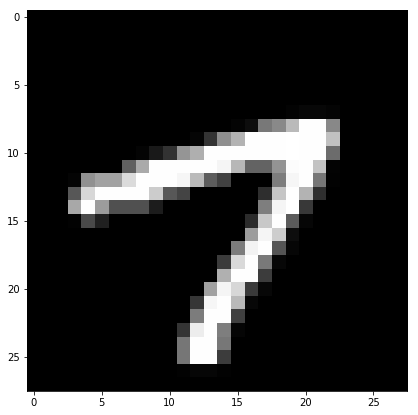

7


In [4]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 100

grid_data = d.iloc[idx].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

In [5]:
# Pick first 15K data-points to work on for time-effeciency.
#Excercise: Perform the same analysis on all of 42K data-points.

labels = l.head(42000)
data = d.head(42000)

print("the shape of sample data = ", data.shape)


the shape of sample data =  (42000, 784)


In [6]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


(42000, 784)


In [7]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)


The shape of variance matrix =  (784, 784)


In [8]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [9]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 42000)  =  (2, 42000)


In [10]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -7.872802       8.689100    0.0
1       9.182235       2.353530    4.0
2      -3.521459      -6.676214    1.0
3       2.753326      -5.033567    9.0
4      -3.152686       2.220413    2.0


C:\Users\Abhishek.Sharma7\AppData\Local\Continuum\anaconda3\anaconda4\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


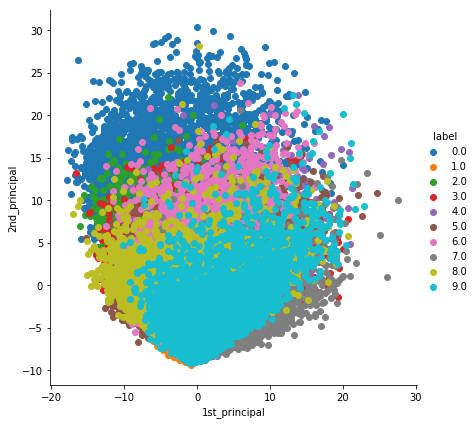

In [11]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [12]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


In [13]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)



shape of pca_reduced.shape =  (42000, 2)


C:\Users\Abhishek.Sharma7\AppData\Local\Continuum\anaconda3\anaconda4\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


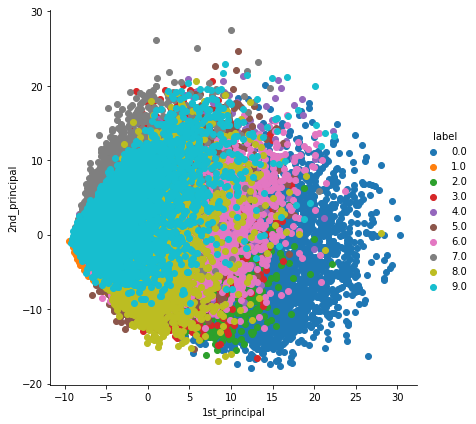

In [14]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

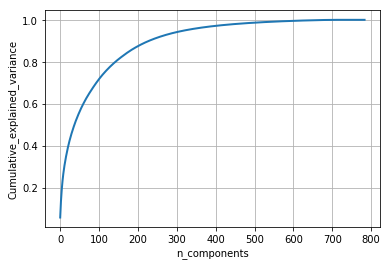

In [15]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

In [16]:
pca_df.head()

,1st_principal,2nd_principal,label
0,8.689081,-7.872948,0.0
1,2.353582,9.182102,4.0
2,-6.676185,-3.521543,1.0
3,-5.033584,2.753111,9.0
4,2.220390,-3.152895,2.0


In [17]:
# Now lets checking the Accuracy.

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(pca_df.drop(['label'],axis=1),pca_df['label'],test_size=0.25)

In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, Y_train)

C:\Users\Abhishek.Sharma7\AppData\Local\Continuum\anaconda3\anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhishek.Sharma7\AppData\Local\Continuum\anaconda3\anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [21]:
pred=clf.predict(X_test)


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, pred)

0.3243809523809524

In [23]:
d0.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# X_train,X_test,Y_train,Y_test = train_test_split(d0.drop(['5'],axis=1).head(10000),d0['5'].head(10000),test_size=0.25)
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression().fit(X_train, Y_train)
# pred=clf.predict(X_test)
# from sklearn.metrics import accuracy_score
# accuracy_score(Y_test, pred)

# Lets try with T-SNE

C:\Users\Abhishek.Sharma7\AppData\Local\Continuum\anaconda3\anaconda4\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


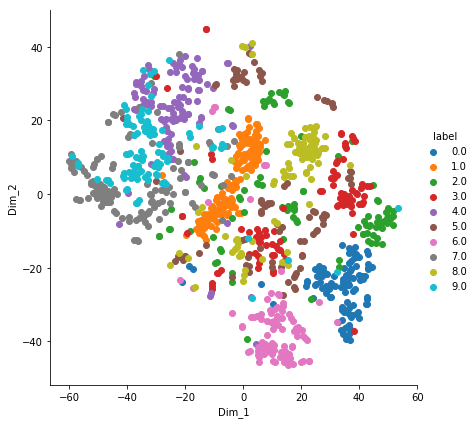

In [25]:
# TSNE

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(tsne_df.drop(['label'],axis=1),tsne_df.label,test_size=0.25)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, Y_train)
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, pred)

C:\Users\Abhishek.Sharma7\AppData\Local\Continuum\anaconda3\anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhishek.Sharma7\AppData\Local\Continuum\anaconda3\anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.524

# So its clear that T-SNE is more Effective than PCA